# Inlcuding Header Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve , roc_auc_score

# Loading the dataset

In [2]:
file = pd.read_csv("data.csv" , index_col= 0)
file.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


## Dividing dataset into features and result

In [3]:
x = file[["location" , "country" , "gender" , "age" , "vis_wuhan" , "from_wuhan" , "symptom1" , "symptom2" , "symptom3"
          , "symptom4" , "symptom5" , "symptom6" , "diff_sym_hos"]].values ## features
y = file.result.values ## result

# Resampling dataset

In [4]:
## splitting the dataset into xTrain , yTrain , xTest , yTest
xTrain , xTest , yTrain , yTest = train_test_split(x,y, test_size= 0.1 , shuffle= True , random_state= 3)

# Feature scaling
### we are making feature scaling to the training and test data of independent variables , to reduce the size to a smaller value

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(xTrain)
X_test = sc.transform(xTest)

# training our Logistic SVM model.

In [6]:
# Instantiate the Support Vector Classifier (SVC)
classifier = SVC(kernel = 'linear', random_state = 0 , probability=True)
# Fit the model
classifier.fit(X_train, yTrain)

SVC(kernel='linear', probability=True, random_state=0)

# Make the predictions

In [7]:
# Make the predictions
y_pred = classifier.predict(X_test)

# Evaluating the model
we will evaluate our model using the confusion matrix and classification report by comparing the predicted and actual test values

In [8]:
cm = confusion_matrix(yTest, y_pred) ## confusion matrix
cr = classification_report(yTest,y_pred) ## classification report
print("Confusion matrix\n\n" ,cm , "\n")
print(cr)

Confusion matrix

 [[76  3]
 [ 3  5]] 

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        79
           1       0.62      0.62      0.62         8

    accuracy                           0.93        87
   macro avg       0.79      0.79      0.79        87
weighted avg       0.93      0.93      0.93        87



# Area Under the Curve (AUC)

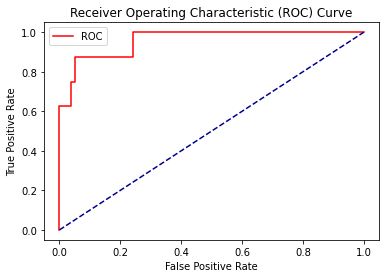

In [9]:
fpr, tpr, thresholds = roc_curve(yTest, classifier.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()


In [10]:
roc_auc_score(yTest, classifier.predict_proba(X_test)[:,1])

0.9588607594936709